In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input

In [2]:
text1_max_words=10000
text2_max_words=10000
answer_max_words=500

In [3]:
text1_input = Input(shape=(None,), dtype='int32', name='text1')
embedded_text1 = layers.Embedding(text1_max_words,64)(text1_input)
encoded_text1 = layers.LSTM(32)(embedded_text1)

In [13]:
text2_input = Input(shape=(None,), dtype='int32', name='text2')
embedded_text2 = layers.Embedding(text2_max_words,32)(text2_input)
encoded_text2 = layers.LSTM(16)(embedded_text2)

In [14]:
concatenated = layers.concatenate([encoded_text1, encoded_text2], axis=-1)

In [15]:
import numpy as np
a = np.arange(10).reshape(2,5)
print('a',a,'\n')

a [[0 1 2 3 4]
 [5 6 7 8 9]] 



In [16]:
b = np.arange(20,30).reshape(2,5)
print('b',b,'\n')

b [[20 21 22 23 24]
 [25 26 27 28 29]] 



In [17]:
import tensorflow as tf
print('axis=0', tf.keras.layers.concatenate([a,b],axis=0),'\n')
print('axis=1', tf.keras.layers.concatenate([a,b],axis=1),'\n')
print('axis=-1', tf.keras.layers.concatenate([a,b],axis=-1))

axis=0 tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(4, 5), dtype=int32) 

axis=1 tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int32) 

axis=-1 tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int32)


In [18]:
answer = tf.keras.layers.Dense(answer_max_words, activation='softmax')(concatenated)

In [19]:
model = Model(inputs=[text1_input, text2_input], outputs=answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['acc'])

In [20]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text1 (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
text2 (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     640000      text1[0][0]                      
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 32)     320000      text2[0][0]                      
_______________________________________________________________________________________

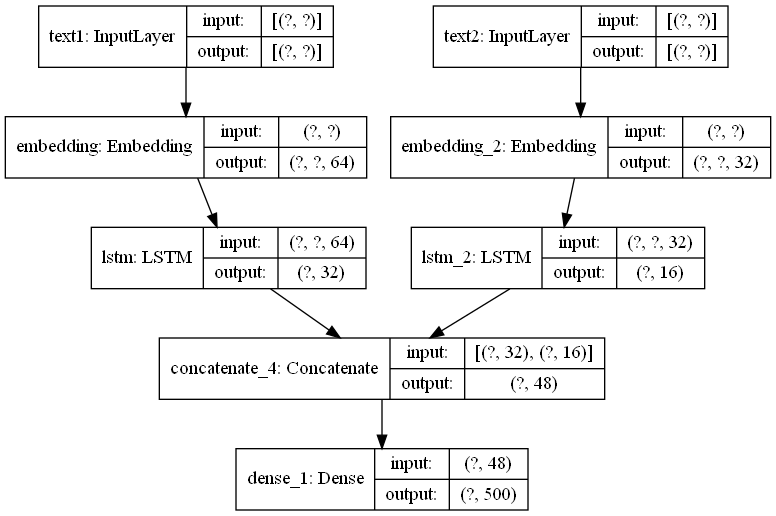

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [22]:
import numpy as np
from tensorflow.keras.utils import to_categorical

num_samples = 1000
max_len = 100

In [23]:
text1 = np.random.randint(low=0, high=text1_max_words,size=(num_samples,max_len))
text2 = np.random.randint(low=0, high=text2_max_words,size=(num_samples,max_len))

In [24]:
answers = np.random.randint(low=0, high=answer_max_words,size=num_samples)
answers = to_categorical(answers)

In [25]:
answers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
model.fit({'text1':text1, 'text2':text2}, answers, epochs=3, batch_size=128)

Epoch 1/3
8/8 [==============================] - 0s 52ms/step - loss: 6.2146 - acc: 0.0010
Epoch 2/3
8/8 [==============================] - 0s 54ms/step - loss: 6.1970 - acc: 0.0270
Epoch 3/3
8/8 [==============================] - 0s 47ms/step - loss: 6.1431 - acc: 0.0060


In [29]:
prediction = model.predict({'text1':text1,'text2':text2})
label = np.argmax(prediction[0])
print(label)

82


In [30]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model

max_words = 10000
num_income_groups = 10

In [31]:
posts_input = Input(shape=(None,),dtype='int32', name='posts')
embedded_posts = layers.Embedding(max_words,256)(posts_input)

In [32]:
x = layers.Conv1D(filters=128, kernel_size=5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=2, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)


In [34]:
pred_age = layers.Dense(1, name='age')(x)
pred_income = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
pred_gender = layers.Dense(1, activation='sigmoid',name='gender')(x)

In [35]:
model = Model(posts_input, [pred_age, pred_income, pred_gender])

In [37]:
model.compile(optimizer='rmsprop',loss={'age':'mse','income':'categorical_crossentropy','gender':'binary_crossentropy'},
loss_weights={'age':0.25,'income':1.0,'gender':10.0},metrics=['accuracy'])

In [38]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 256)    2560000     posts[0][0]                      
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 128)    163968      embedding_3[0][0]                
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, None, 128)    0           conv1d[0][0]                     
_______________________________________________________________________________________

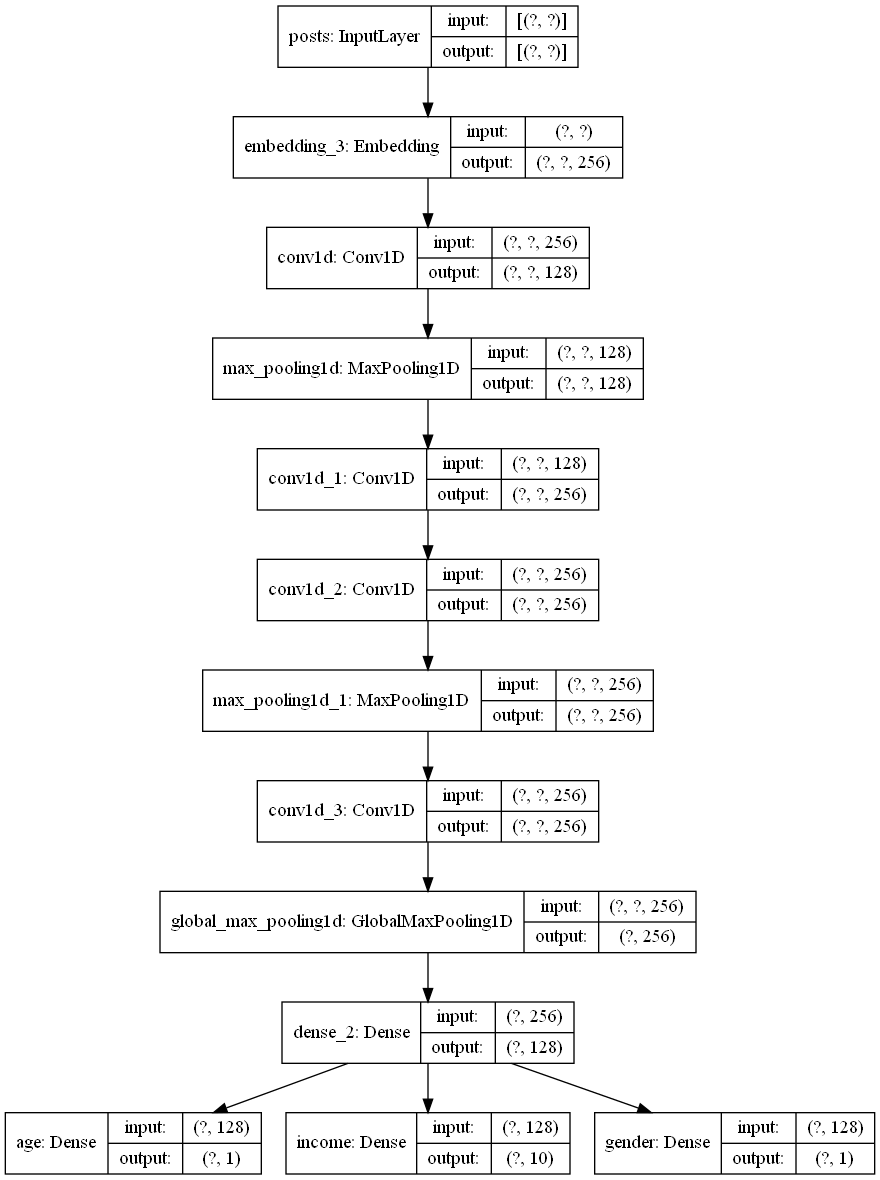

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)